In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
json_pwd_transfer1 = "/Users/admin/experiments/nt3_s32_p64_1epoch_exptransfer_1gpu_out2/history"
json_pwd_transfer10 = "/Users/admin/nt3_s32_p64_1epoch_exptransfer_1gpu_beta10_out/history"
json_pwd_transfer100 = "/Users/admin/nt3_s32_p64_1epoch_exptransfer_1gpu_beta100_out/history"

nas_results_path_transfer1="/Users/admin/experiments/nt3_s32_p64_1epoch_exptransfer_1gpu_out2/results.csv"
nas_results_path_transfer10="/Users/admin/nt3_s32_p64_1epoch_exptransfer_1gpu_beta10_out/results.csv"
nas_results_path_transfer100="/Users/admin/nt3_s32_p64_1epoch_exptransfer_1gpu_beta100_out/results.csv"

In [6]:
df_transfer1 = pd.read_csv(nas_results_path_transfer1)
df_transfer10 = pd.read_csv(nas_results_path_transfer10)
df_transfer100 = pd.read_csv(nas_results_path_transfer100)
print(df_transfer1)
print(df_transfer10)
print(df_transfer100)

                       arch_seq    id  objective  elapsed_sec    duration
0     [8, 15, 1, 0, 6, 2, 0, 7]     1   0.514286   292.965963  103.004972
1     [2, 17, 1, 2, 4, 0, 0, 5]     2   0.485714   294.463990  104.502943
2      [7, 3, 2, 0, 2, 2, 2, 1]     3   0.885714   295.809165  105.848073
3      [3, 5, 0, 0, 6, 2, 1, 7]     4   0.764286   297.288394  107.327258
4     [2, 16, 0, 2, 4, 2, 0, 2]     5   0.485714   298.650323  108.689146
..                          ...   ...        ...          ...         ...
995   [9, 25, 0, 0, 1, 0, 0, 1]   996   0.982143  1922.122331  448.208458
996   [9, 25, 0, 1, 3, 1, 1, 2]   997   0.932143  1923.832493  448.384449
997   [9, 25, 0, 0, 1, 0, 2, 6]   998   0.971429  1925.596342  448.456840
998  [19, 25, 0, 1, 3, 1, 2, 2]   999   0.903571  1927.061601  447.881491
999    [9, 9, 0, 1, 3, 1, 2, 2]  1000   0.910714  1928.789482  448.085236

[1000 rows x 5 columns]
                      arch_seq    id  objective  elapsed_sec    duration
0    [8, 15, 1

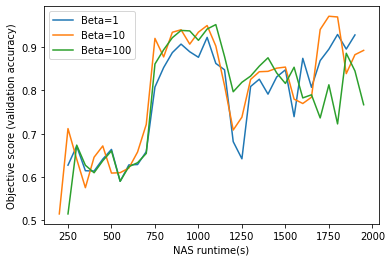

In [10]:
import math

#max insteaad of aaverage
#annotate NAS rounds - lines that indicate where rtransfer begins
#show a distribution for eaach line - create a copy of each one and perturb it by  araandom dist
#cannot asssume x values are the same 
#nornmaalize so they start at zero
duration_quantized_transfer1 = df_transfer1.elapsed_sec.apply( lambda x: 50*math.floor((x)/50)) 
duration_quantized_transfer10 = df_transfer10.elapsed_sec.apply( lambda x: 50*math.floor((x)/50)) 
duration_quantized_transfer100 = df_transfer100.elapsed_sec.apply( lambda x: 50*math.floor((x)/50)) 


df_transfer1['quantized_duration']  = duration_quantized_transfer1
df_transfer10['quantized_duration']  = duration_quantized_transfer10
df_transfer100['quantized_duration']  = duration_quantized_transfer100

result_transfer1 = df_transfer1.groupby('quantized_duration').mean()
result_transfer10 = df_transfer10.groupby('quantized_duration').mean()
result_transfer100 = df_transfer100.groupby('quantized_duration').mean()



 

plt.plot(result_transfer1.index, result_transfer1['objective'],  label='Beta=1' )
plt.plot(result_transfer10.index, result_transfer10['objective'],  label='Beta=10' )
plt.plot(result_transfer100.index, result_transfer100['objective'],  label='Beta=100' )
plt.xlabel('NAS runtime(s)')
plt.ylabel('Objective score (validation accuracy)')
plt.legend()

In [20]:
import json
import os
# assign directory
directory = json_pwd_transfer1

# iterate over files in
# that directory
json_filepaths = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        json_filepaths.append(f)

training_times = []
storing_times = []
num_layers_transferred = []
for json_file in json_filepaths:
    f = open (json_file, "r")
    data = json.loads(f.read())
    training_times.append(data['training_time'])
    storing_times.append(data['storing_time'])
    num_layers_transferred.append(data['num_layers_transferred'])
    
mean_training_time_baseline = np.mean(training_times)   
mean_storing_time_transfer1 = np.mean(storing_times) 
mean_layer_transferred_transfer1 = np.mean(num_layers_transferred)

(array([319., 351.,  12.,   5.,  20.,  52.,  42.,  56.,  74.,  69.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

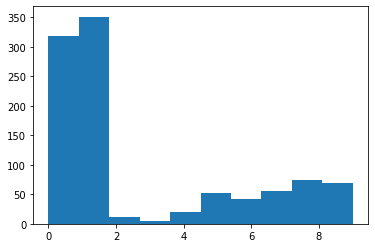

In [27]:
import json
import os
# assign directory
directory = json_pwd_transfer100

# iterate over files in
# that directory
json_filepaths = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        json_filepaths.append(f)

training_times = []
storing_times = []
num_layers_transferred = []
for json_file in json_filepaths:
    f = open (json_file, "r")
    data = json.loads(f.read())
    training_times.append(data['training_time'])
    storing_times.append(data['storing_time'])
    num_layers_transferred.append(data['num_layers_transferred'])
    
mean_training_time_transfer = np.mean(training_times)   
mean_storing_time_transfer10 = np.mean(storing_times) 
mean_layer_transferred_transfer100 = np.mean(num_layers_transferred)
plt.hist(num_layers_transferred)

Text(0, 0.5, 'number of layers transferred ')

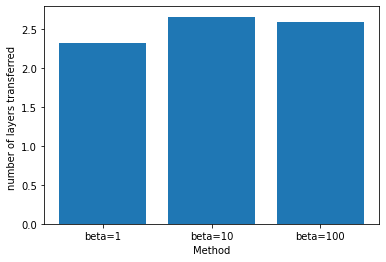

In [26]:
x = ['beta=1', 'beta=10', 'beta=100']
plt.bar(x, [mean_layer_transferred_transfer1, mean_layer_transferred_transfer10,mean_layer_transferred_transfer100 ] )
plt.xlabel('Method')
plt.ylabel('number of layers transferred ')




Text(0, 0.5, 'storing time ')

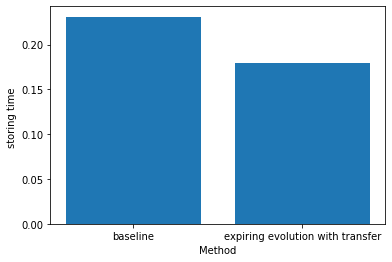

In [69]:
plt.bar(x, [mean_storing_time_transfer,mean_storing_time_baseline] )
plt.xlabel('Method')
plt.ylabel('storing time ')

([<matplotlib.axis.XTick at 0x7f82524ce5b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

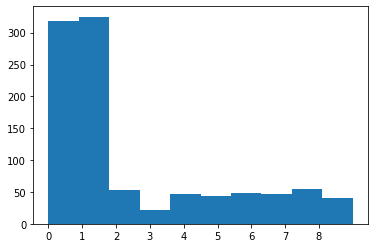

In [83]:
num_layers_transferred.sort()
num_layers_transferred
plt.hist(num_layers_transferred)
plt.xticks(range(0,9))

In [ ]:
average checkpoint size: 30MB
checkpoint size of all checkpoints 31G